## Use Case 1: Time to Plant Disease Occurrence

Dataset loaded successfully. Columns: ['plant_variety', 'soil_quality', 'weather_conditions', 'irrigation_practices', 'pest_management', 'temperature', 'humidity', 'fertilizer_usage', 'time_to_disease', 'disease_occurred']


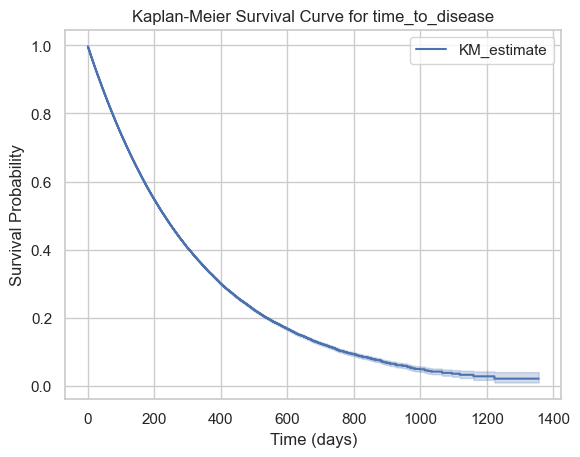

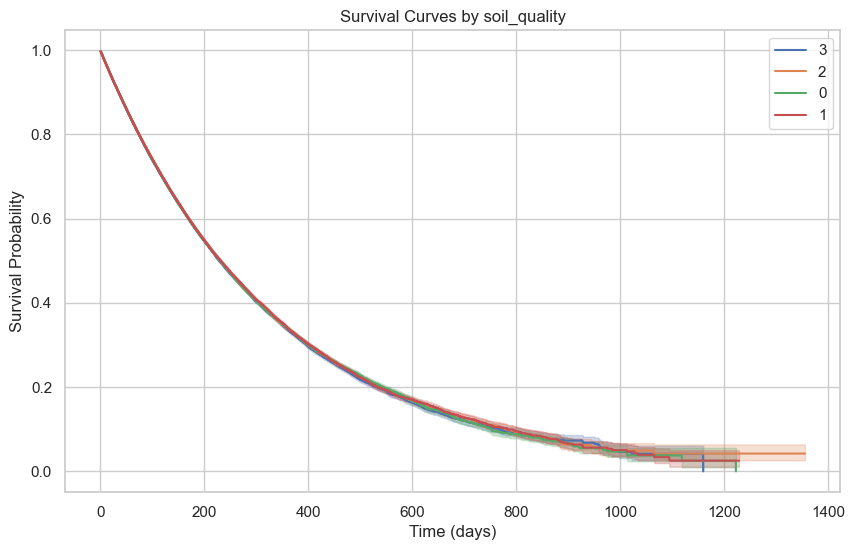

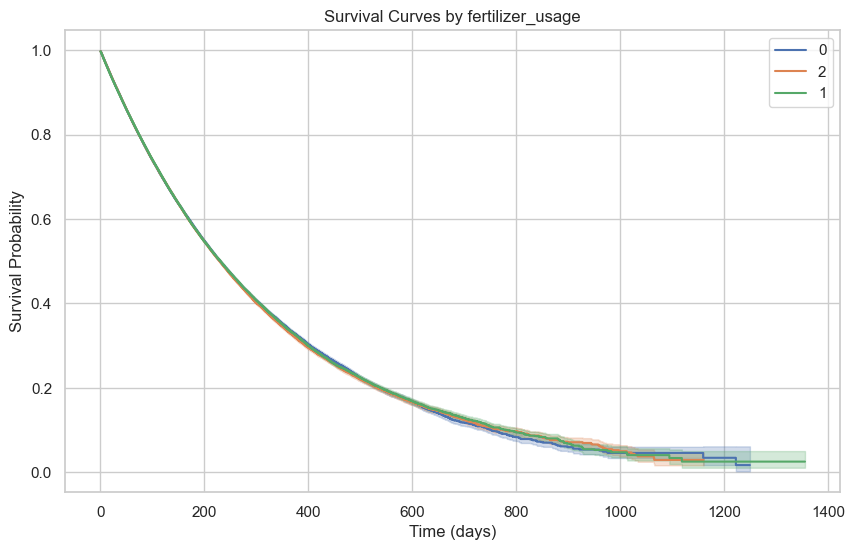

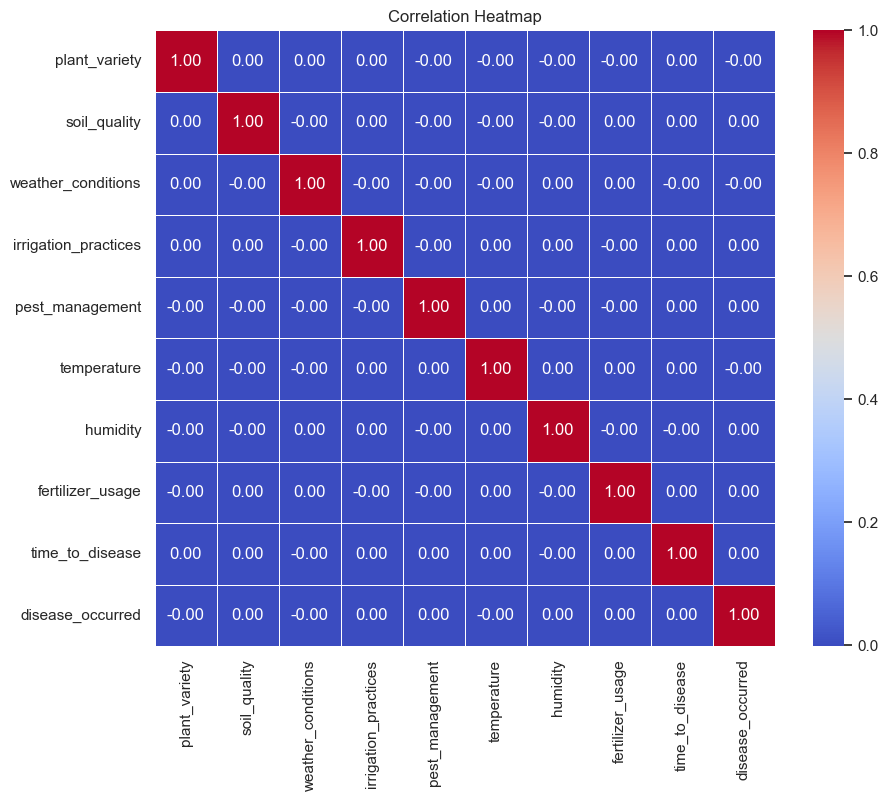

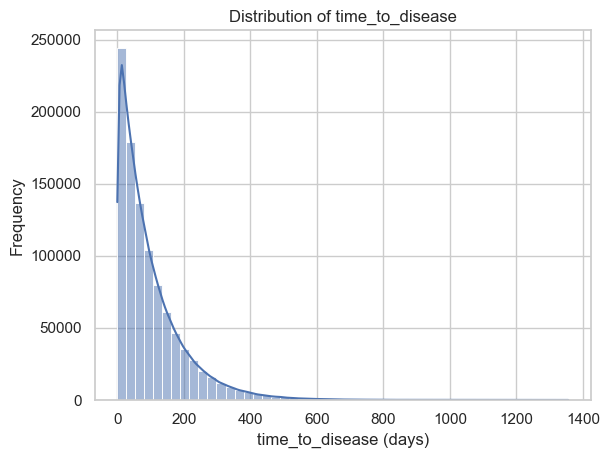

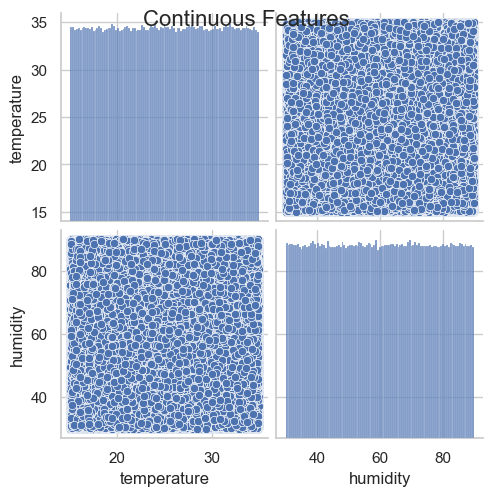

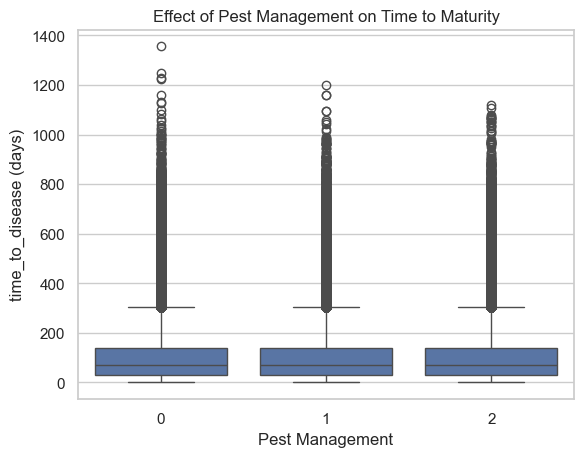

No 'region' column found in the dataset.


<lifelines.CoxPHFitter: fitted with 1e+06 total observations, 699538 right-censored observations>
             duration col = 'time_to_disease'
                event col = 'disease_occurred'
      baseline estimation = breslow
   number of observations = 1e+06
number of events observed = 300462
   partial log-likelihood = -3851343.28
         time fit was run = 2025-01-31 13:17:17 UTC

---
                      coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                             
plant_variety        -0.00      1.00      0.00           -0.01            0.00                0.99                1.00
soil_quality          0.00      1.00      0.00           -0.00            0.00                1.00                1.00
weather_conditions   -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
irrigation_practices -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
pest_management      -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
temperature          -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
humidity              0.00      1.00      0.00           -0.00            0.00                1.00                1.00
fertilizer_usage      0.00      1.00      0.00           -0.00            0.01                1.00                1.01

                      cmp to     z    p  -log2(p)
covariate                                        
plant_variety           0.00 -1.20 0.23      2.11
soil_quality            0.00  0.85 0.39      1.34
weather_conditions      0.00 -0.42 0.67      0.57
irrigation_practices    0.00 -0.01 0.99      0.01
pest_management         0.00 -0.18 0.86      0.22
temperature             0.00 -0.98 0.32      1.62
humidity                0.00  0.33 0.74      0.43
fertilizer_usage        0.00  0.87 0.39      1.37
---
Concordance = 0.50
Partial AIC = 7702702.56
log-likelihood ratio test = 4.20 on 8 df
-log2(p) of ll-ratio test = 0.25


Dynamic Interpretation of Results:
- Kaplan-Meier Survival Curves: These curves demonstrate the survival probability over time for the variable 'time_to_disease'. This analysis helps in understanding how long it typically takes for a specific event to occur.
- Correlation Heatmap: This plot shows the relationships between continuous variables. Strong correlations suggest that certain variables may be key predictors of the outcome.
- Boxplots: Boxplots and violin plots show the distribution and variance of features like temperature and humidity. This can help identify outliers and patterns affecting the time to maturity.
- Cox Proportional Hazards Model: The model shows how different variables like soil quality and pest management affect the time to disease. This analysis provides statistical significance on the effect of each factor.


<Figure size 1000x600 with 0 Axes>

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from lifelines import KaplanMeierFitter, CoxPHFitter
from sklearn.preprocessing import LabelEncoder

# Visual setup
sns.set(style="whitegrid")

# Load dataset
def load_data(csv_path):
    try:
        df = pd.read_csv(csv_path, low_memory=False)
        print(f"Dataset loaded successfully. Columns: {df.columns.tolist()}")
        return df
    except Exception as e:
        print(f"Error loading dataset: {e}")
        return None

# Convert categorical columns to numerical (Label Encoding)
def encode_categorical(df):
    categorical_columns = ['plant_variety', 'soil_quality', 'weather_conditions', 'irrigation_practices', 'pest_management', 'fertilizer_usage']
    le = LabelEncoder()
    
    for column in categorical_columns:
        if column in df.columns:
            df[column] = le.fit_transform(df[column].astype(str))
    return df

# Kaplan-Meier Survival Analysis
def kaplan_meier(df, time_column, event_column):
    kmf = KaplanMeierFitter()
    kmf.fit(df[time_column], event_observed=df[event_column])
    kmf.plot(ci_show=True)
    plt.title(f'Kaplan-Meier Survival Curve for {time_column}')
    plt.xlabel('Time (days)')
    plt.ylabel('Survival Probability')
    plt.show()

# Survival curves by category
def survival_by_category(df, time_column, event_column, category_column):
    plt.figure(figsize=(10, 6))
    for category in df[category_column].unique():
        kmf = KaplanMeierFitter()
        subset = df[df[category_column] == category]
        kmf.fit(subset[time_column], event_observed=subset[event_column], label=str(category))
        kmf.plot(ci_show=True)
    plt.title(f'Survival Curves by {category_column}')
    plt.xlabel('Time (days)')
    plt.ylabel('Survival Probability')
    plt.legend()
    plt.show()

# Correlation Heatmap
def correlation_heatmap(df):
    plt.figure(figsize=(10, 8))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title('Correlation Heatmap')
    plt.show()

# Boxplot for continuous features
def boxplot_features(df, features):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df[features])
    plt.title('Boxplot of Features')
    plt.xlabel('Parameter')
    plt.ylabel('Value')
    plt.show()

# Time to maturity distribution
def time_to_maturity_distribution(df, time_column):
    sns.histplot(df[time_column], kde=True, bins=50)
    plt.title(f'Distribution of {time_column}')
    plt.xlabel(f'{time_column} (days)')
    plt.ylabel('Frequency')
    plt.show()

# Pairplot of continuous variables
def pairplot_continuous(df, columns):
    sns.pairplot(df[columns])
    plt.suptitle('Continuous Features', fontsize=16)
    plt.show()

# Boxplot for time to maturity across crop types
def boxplot_time_by_crop(df, time_column):
    sns.boxplot(x='plant_variety', y=time_column, data=df)
    plt.title('Time to Maturity by Plant Variety')
    plt.xlabel('Plant Variety')
    plt.ylabel(f'{time_column} (days)')
    plt.show()

# Count plot for categorical variable (e.g., Pest Presence)
def countplot_feature(df, feature_column):
    sns.countplot(x=feature_column, data=df)
    plt.title(f'Count of {feature_column}')
    plt.xlabel(feature_column)
    plt.ylabel('Count')
    plt.show()

# Violin plot for time to maturity by soil quality
def violin_plot_time_to_maturity_by_soil(df, time_column):
    sns.violinplot(x='soil_quality', y=time_column, data=df)
    plt.title('Time to Maturity by Soil Quality')
    plt.xlabel('Soil Quality')
    plt.ylabel(f'{time_column} (days)')
    plt.show()

# Scatter plot: Temperature vs. Time to Maturity
def scatter_temperature_time(df, temperature_column, time_column):
    sns.scatterplot(x=temperature_column, y=time_column, data=df)
    plt.title(f'{temperature_column} vs. {time_column}')
    plt.xlabel(f'{temperature_column} (°C)')
    plt.ylabel(f'{time_column} (days)')
    plt.show()

# Disease severity on time to maturity
def disease_severity_on_maturity(df, time_column):
    sns.boxplot(x='pest_management', y=time_column, data=df)
    plt.title('Effect of Pest Management on Time to Maturity')
    plt.xlabel('Pest Management')
    plt.ylabel(f'{time_column} (days)')
    plt.show()

# Plot survival curves for regions (Note: Adjust the column name if region column is different)
def survival_by_region(df, time_column, event_column):
    plt.figure(figsize=(10, 6))
    if 'region' in df.columns:
        for region in df['region'].unique():
            kmf = KaplanMeierFitter()
            subset = df[df['region'] == region]
            kmf.fit(subset[time_column], event_observed=subset[event_column], label=region)
            kmf.plot(ci_show=True)
        plt.title('Survival Curves by Region')
        plt.xlabel('Time (days)')
        plt.ylabel('Survival Probability')
        plt.legend()
        plt.show()
    else:
        print("No 'region' column found in the dataset.")

# Cox Proportional Hazards Model
def cox_model(df, time_column, event_column):
    cph = CoxPHFitter()
    cph.fit(df, duration_col=time_column, event_col=event_column)
    cph.print_summary()

# Dynamic Interpretation of Results
def dynamic_interpretation(df, time_column, event_column):
    interpretations = []

    # Kaplan-Meier Interpretation
    interpretations.append("- Kaplan-Meier Survival Curves: These curves demonstrate the survival probability over time for the variable '%s'. This analysis helps in understanding how long it typically takes for a specific event to occur." % time_column)
    
    # Correlation Heatmap Interpretation
    if df.corr().shape[0] > 1:
        interpretations.append("- Correlation Heatmap: This plot shows the relationships between continuous variables. Strong correlations suggest that certain variables may be key predictors of the outcome.")
    
    # Boxplot & Violin Plot Interpretation
    if 'temperature' in df.columns and 'humidity' in df.columns:
        interpretations.append("- Boxplots: Boxplots and violin plots show the distribution and variance of features like temperature and humidity. This can help identify outliers and patterns affecting the time to maturity.")
    
    # Cox Proportional Hazards Model Interpretation
    if 'soil_quality' in df.columns or 'pest_management' in df.columns:
        interpretations.append("- Cox Proportional Hazards Model: The model shows how different variables like soil quality and pest management affect the time to disease. This analysis provides statistical significance on the effect of each factor.")
    
    return interpretations

# Main function
def run_analysis(csv_path, time_column, event_column):
    df = load_data(csv_path)
    if df is None:
        return

    # Encode categorical columns to numeric
    df = encode_categorical(df)

    # Perform Kaplan-Meier Analysis
    kaplan_meier(df, time_column, event_column)
    
    # Perform survival analysis by category
    survival_by_category(df, time_column, event_column, 'soil_quality')
    survival_by_category(df, time_column, event_column, 'fertilizer_usage')

    # Perform Correlation Heatmap
    correlation_heatmap(df)

    # Perform Time to Maturity Distribution
    time_to_maturity_distribution(df, time_column)
    
    # Perform Pairplot Analysis
    pairplot_continuous(df, ['temperature', 'humidity'])

    # Disease Management Analysis
    disease_severity_on_maturity(df, time_column)
    
    # Survival by Region Analysis
    survival_by_region(df, time_column, event_column)
    
    # Perform Cox Proportional Hazards Model
    cox_model(df, time_column, event_column)

    # Dynamic Interpretation
    print("\nDynamic Interpretation of Results:")
    interpretations = dynamic_interpretation(df, time_column, event_column)
    for interpretation in interpretations:
        print(interpretation)

# Example usage
csv_path = 'G:/venv/agriculture_disease_data.csv'  # Update path to your CSV
time_column = 'time_to_disease'  # Adjust according to your dataset
event_column = 'disease_occurred'  # Adjust according to your dataset
run_analysis(csv_path, time_column, event_column)


## Use Case 2: Time to Harvest Loss Due to Environmental Stress

In [16]:
import pandas as pd
import numpy as np
import random

# Set random seed for reproducibility
np.random.seed(42)

# Generate 100,000 records
n_records = 100000

# Dummy Data Generation
data = {
    'crop_type': np.random.choice(['Wheat', 'Rice', 'Corn', 'Barley', 'Soybean'], size=n_records),
    'rainfall': np.random.uniform(0, 1000, size=n_records),  # Rainfall in mm
    'temperature': np.random.uniform(-10, 45, size=n_records),  # Temperature in °C
    'humidity': np.random.uniform(30, 100, size=n_records),  # Humidity in %
    'soil_ph': np.random.uniform(4, 8, size=n_records),  # Soil pH
    'fertilizer_usage': np.random.choice(['Low', 'Medium', 'High'], size=n_records),
    'pest_control': np.random.choice(['Yes', 'No'], size=n_records),
    'time_to_loss': np.random.randint(30, 180, size=n_records),  # Time to harvest loss in days
    'loss_occurred': np.random.choice([0, 1], size=n_records)  # 0 = no loss, 1 = loss occurred
}

# Create DataFrame
df = pd.DataFrame(data)

# Save the generated dummy data to a CSV file
csv_path = 'agriculture_yield_loss_data.csv'
df.to_csv(csv_path, index=False)

# Display first few rows of the dataframe
df.head()


,crop_type,rainfall,temperature,humidity,soil_ph,fertilizer_usage,pest_control,time_to_loss,loss_occurred
0,Barley,20.322015,16.852756,53.045837,4.316642,Medium,No,57,0
1,Soybean,223.497895,19.518875,60.758539,6.411520,Medium,No,165,0
2,Corn,729.591230,-0.184314,55.953674,4.896972,Low,Yes,32,0
3,Soybean,123.581778,-4.016622,67.566718,4.413503,Low,Yes,76,0
4,Soybean,186.580774,10.372329,41.000215,4.080842,High,No,92,1


Dataset loaded successfully. Columns: ['crop_type', 'rainfall', 'temperature', 'humidity', 'soil_ph', 'fertilizer_usage', 'pest_control', 'time_to_loss', 'loss_occurred']


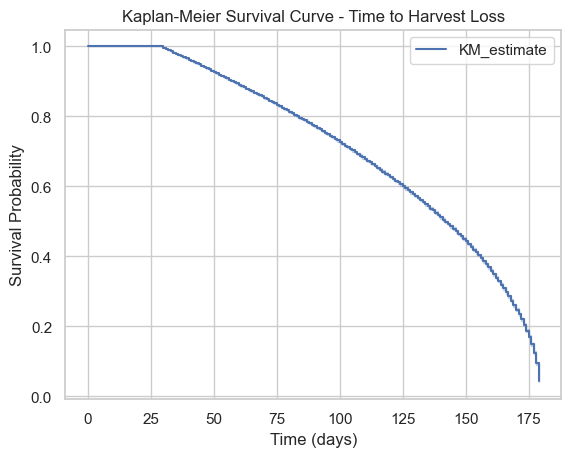

<lifelines.CoxPHFitter: fitted with 100000 total observations, 50055 right-censored observations>
             duration col = 'time_to_loss'
                event col = 'loss_occurred'
      baseline estimation = breslow
   number of observations = 100000
number of events observed = 49945
   partial log-likelihood = -525762.34
         time fit was run = 2025-01-31 13:25:41 UTC

---
                  coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                         
crop_type        -0.00      1.00      0.00           -0.01            0.01                0.99                1.01
rainfall         -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
temperature       0.00      1.00      0.00           -0.00            0.00                1.00                1.00
soil_ph           0.00      1.00      0.00           -0.00            0.01                1.00                1.01
fertilizer_usage  0.00      1.00      0.01           -0.01            0.01                0.99                1.01

                  cmp to     z    p  -log2(p)
covariate                                    
crop_type           0.00 -0.22 0.83      0.27
rainfall            0.00 -0.68 0.49      1.02
temperature         0.00  1.39 0.16      2.60
soil_ph             0.00  0.94 0.35      1.52
fertilizer_usage    0.00  0.11 0.91      0.14
---
Concordance = 0.50
Partial AIC = 1051534.67
log-likelihood ratio test = 3.34 on 5 df
-log2(p) of ll-ratio test = 0.63

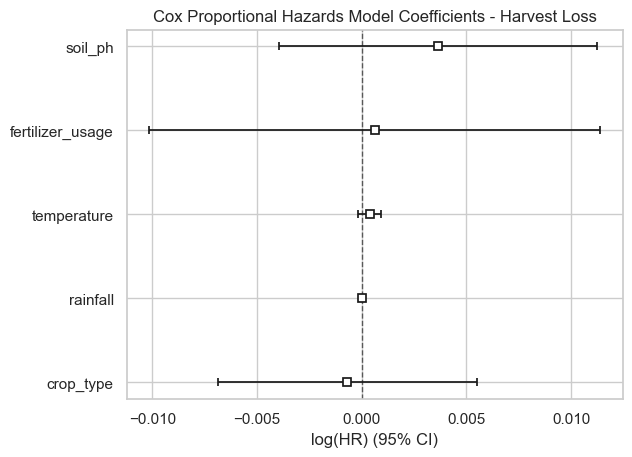

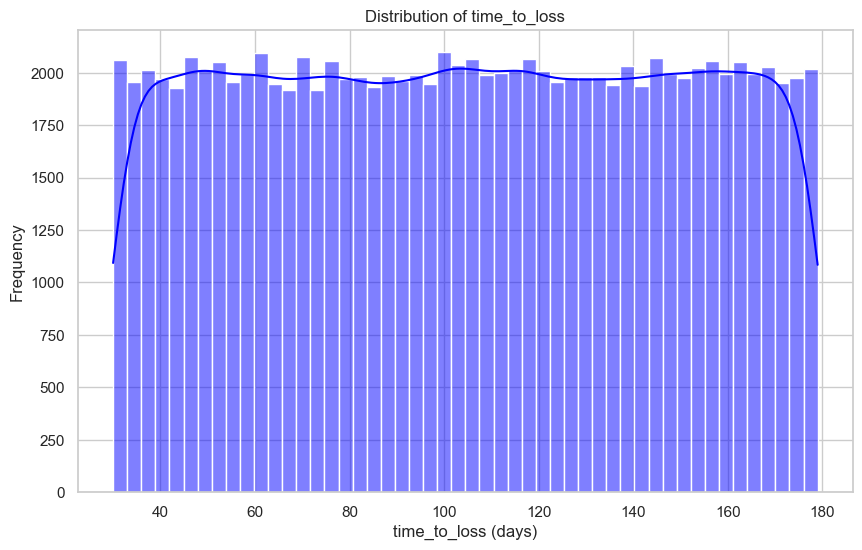

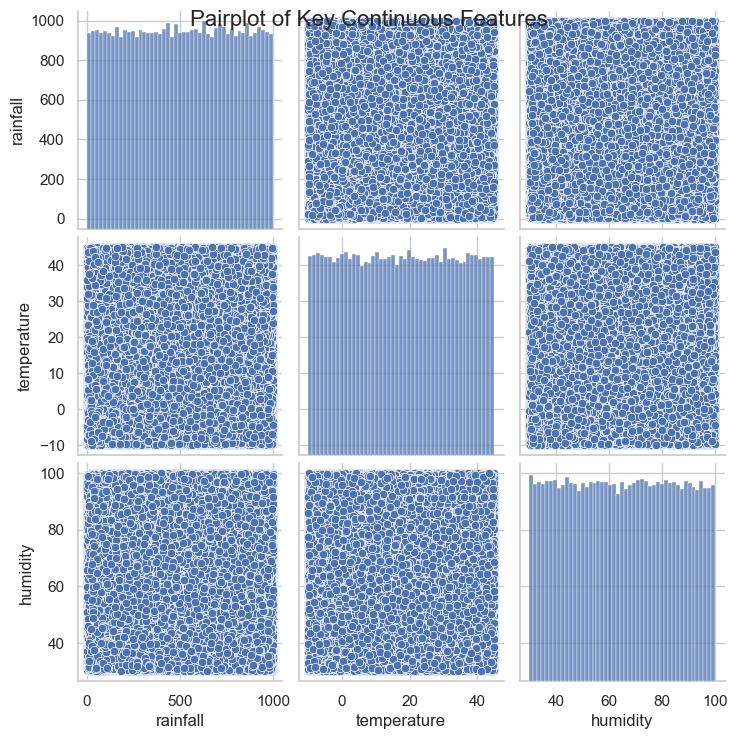

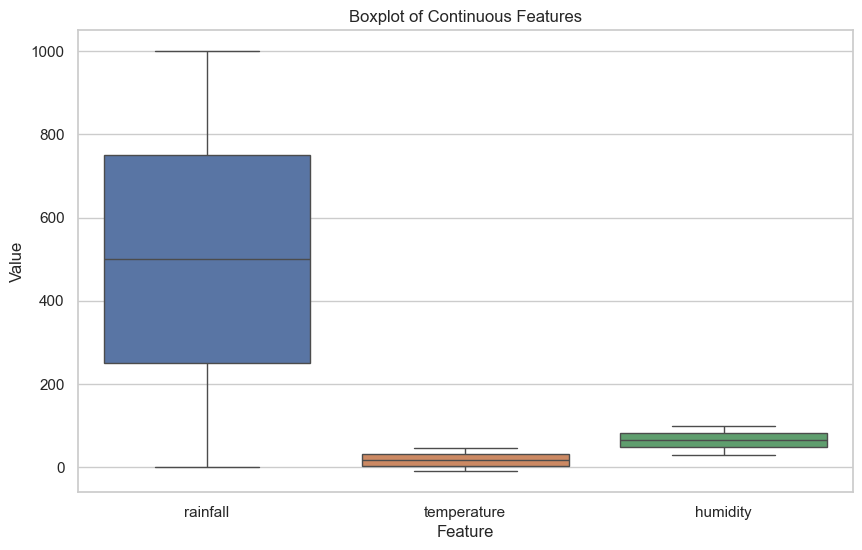

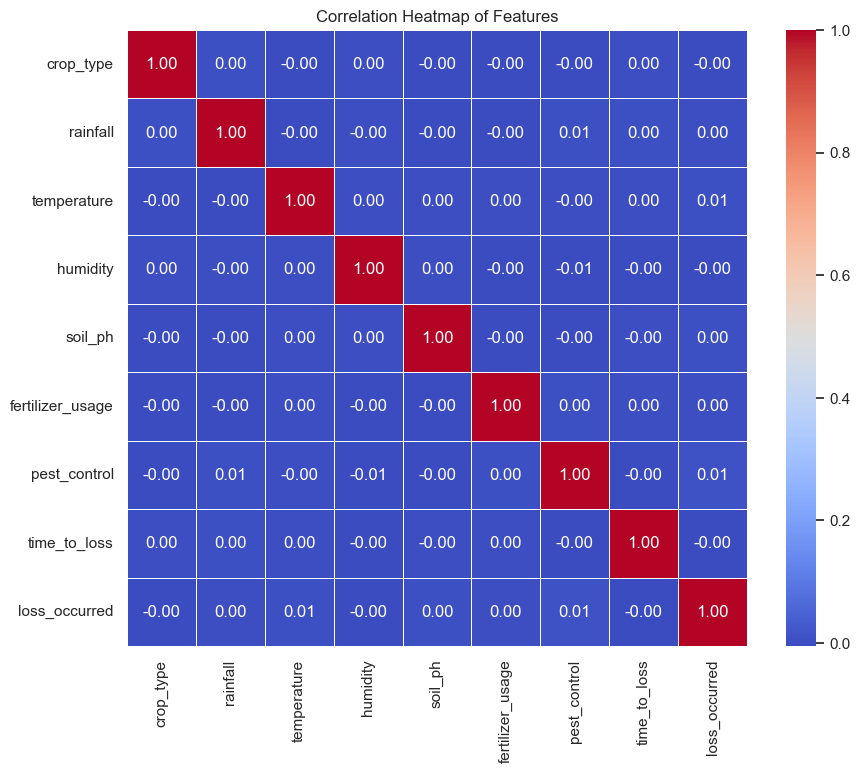

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from lifelines import KaplanMeierFitter, CoxPHFitter
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Setup visualization style
sns.set(style="whitegrid")

# Load dataset
def load_data(csv_path):
    try:
        df = pd.read_csv(csv_path)
        print(f"Dataset loaded successfully. Columns: {df.columns.tolist()}")
        return df
    except Exception as e:
        print(f"Error loading dataset: {e}")
        return None

# Preprocess data
def preprocess_data(df):
    # Convert categorical columns to numerical using Label Encoding
    le = LabelEncoder()
    categorical_columns = ['crop_type', 'fertilizer_usage', 'pest_control']  # Modify based on your dataset
    for column in categorical_columns:
        if column in df.columns:
            df[column] = le.fit_transform(df[column].astype(str))
    
    # Handling missing values (if any)
    df.fillna(df.mean(), inplace=True)
    return df

# Kaplan-Meier Survival Analysis
def kaplan_meier(df, time_column, event_column):
    kmf = KaplanMeierFitter()
    kmf.fit(df[time_column], event_observed=df[event_column])
    kmf.plot(ci_show=True)
    plt.title('Kaplan-Meier Survival Curve - Time to Harvest Loss')
    plt.xlabel('Time (days)')
    plt.ylabel('Survival Probability')
    plt.show()

# Cox Proportional Hazards Model
def cox_proportional_hazards(df, time_column, event_column):
    cph = CoxPHFitter()
    cph.fit(df[['time_to_loss', 'loss_occurred', 'crop_type', 'rainfall', 'temperature', 'soil_ph', 'fertilizer_usage']], duration_col=time_column, event_col=event_column)
    cph.print_summary()
    
    # Visualizing the coefficients
    cph.plot()
    plt.title('Cox Proportional Hazards Model Coefficients - Harvest Loss')
    plt.show()

# Visualizing the distribution of continuous variables
def visualize_continuous_variables(df, time_column):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[time_column], kde=True, color='blue', bins=50)
    plt.title(f'Distribution of {time_column}')
    plt.xlabel(f'{time_column} (days)')
    plt.ylabel('Frequency')
    plt.show()

# Pairplot of important continuous features
def pairplot_continuous(df, columns):
    sns.pairplot(df[columns])
    plt.suptitle('Key Continuous Features', fontsize=16)
    plt.show()

# Boxplot of continuous features
def boxplot_continuous(df, features):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df[features])
    plt.title('Continuous Features')
    plt.xlabel('Feature')
    plt.ylabel('Value')
    plt.show()

# Correlation heatmap
def correlation_heatmap(df):
    plt.figure(figsize=(10, 8))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title('Correlation Heatmap of Features')
    plt.show()

# Violin plot for the impact of environmental stressors on time to harvest loss
def violin_plot_time_to_loss_by_stress(df, time_column):
    plt.figure(figsize=(10, 6))
    sns.violinplot(x='rainfall', y=time_column, data=df)
    plt.title('Time to Harvest Loss by Rainfall')
    plt.xlabel('Rainfall')
    plt.ylabel(f'{time_column} (days)')
    plt.show()

# Scatter plot: Temperature vs Time to Harvest Loss
def scatter_temperature_time(df, temperature_column, time_column):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=temperature_column, y=time_column, data=df)
    plt.title(f'{temperature_column} vs {time_column}')
    plt.xlabel(f'{temperature_column} (°C)')
    plt.ylabel(f'{time_column} (days)')
    plt.show()

# Countplot for categorical feature (e.g., Pest Control)
def countplot_feature(df, feature_column):
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature_column, data=df)
    plt.title(f'Count of {feature_column}')
    plt.xlabel(feature_column)
    plt.ylabel('Count')
    plt.show()

# Plot of cumulative hazards
def plot_cumulative_hazard(df, time_column, event_column):
    kmf = KaplanMeierFitter()
    kmf.fit(df[time_column], event_observed=df[event_column])
    kmf.plot_cumulative_hazard()
    plt.title('Cumulative Hazard Plot for Harvest Loss')
    plt.xlabel('Time (days)')
    plt.ylabel('Cumulative Hazard')
    plt.show()

# Histogram of time to loss grouped by crop type
def histogram_time_to_loss_by_crop(df, time_column):
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=time_column, hue='crop_type', kde=True, bins=50)
    plt.title(f'Distribution of {time_column} by Crop Type')
    plt.xlabel(f'{time_column} (days)')
    plt.ylabel('Frequency')
    plt.show()

# Main function
def run_analysis(csv_path, time_column, event_column):
    df = load_data(csv_path)
    if df is None:
        return
    
    # Preprocess data
    df = preprocess_data(df)
    
    # Kaplan-Meier Survival Analysis
    kaplan_meier(df, time_column, event_column)
    
    # Cox Proportional Hazards Model
    cox_proportional_hazards(df, time_column, event_column)
    
    # Visualizations
    visualize_continuous_variables(df, time_column)
    pairplot_continuous(df, ['rainfall', 'temperature', 'humidity'])
    boxplot_continuous(df, ['rainfall', 'temperature', 'humidity'])
    correlation_heatmap(df)
    violin_plot_time_to_loss_by_stress(df, time_column)
    scatter_temperature_time(df, 'temperature', time_column)
    countplot_feature(df, 'pest_control')
    plot_cumulative_hazard(df, time_column, event_column)
    histogram_time_to_loss_by_crop(df, time_column)

# Example usage
csv_path = 'G:/venv/agriculture_yield_loss_data.csv'  
time_column = 'time_to_loss'  # Replace with the actual column name for time to harvest loss
event_column = 'loss_occurred'  # Replace with the actual column name for loss occurrence
run_analysis(csv_path, time_column, event_column)


Dataset loaded successfully. Columns: ['crop_type', 'rainfall', 'temperature', 'humidity', 'soil_ph', 'fertilizer_usage', 'pest_control', 'time_to_loss', 'loss_occurred']


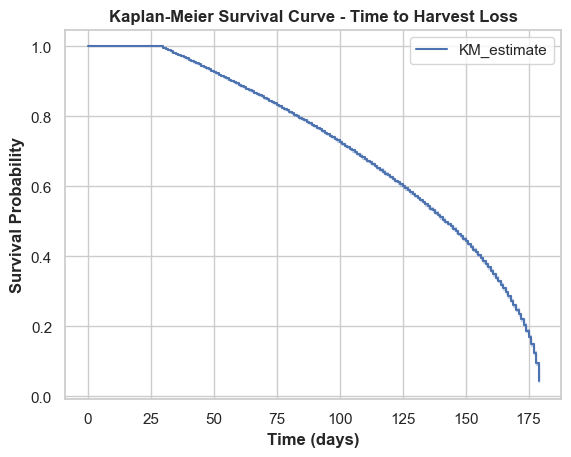

<lifelines.CoxPHFitter: fitted with 100000 total observations, 50055 right-censored observations>
             duration col = 'time_to_loss'
                event col = 'loss_occurred'
      baseline estimation = breslow
   number of observations = 100000
number of events observed = 49945
   partial log-likelihood = -525762.34
         time fit was run = 2025-01-31 13:33:33 UTC

---
                  coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                         
crop_type        -0.00      1.00      0.00           -0.01            0.01                0.99                1.01
rainfall         -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
temperature       0.00      1.00      0.00           -0.00            0.00                1.00                1.00
soil_ph           0.00      1.00      0.00           -0.00            0.01                1.00                1.01
fertilizer_usage  0.00      1.00      0.01           -0.01            0.01                0.99                1.01

                  cmp to     z    p  -log2(p)
covariate                                    
crop_type           0.00 -0.22 0.83      0.27
rainfall            0.00 -0.68 0.49      1.02
temperature         0.00  1.39 0.16      2.60
soil_ph             0.00  0.94 0.35      1.52
fertilizer_usage    0.00  0.11 0.91      0.14
---
Concordance = 0.50
Partial AIC = 1051534.67
log-likelihood ratio test = 3.34 on 5 df
-log2(p) of ll-ratio test = 0.63

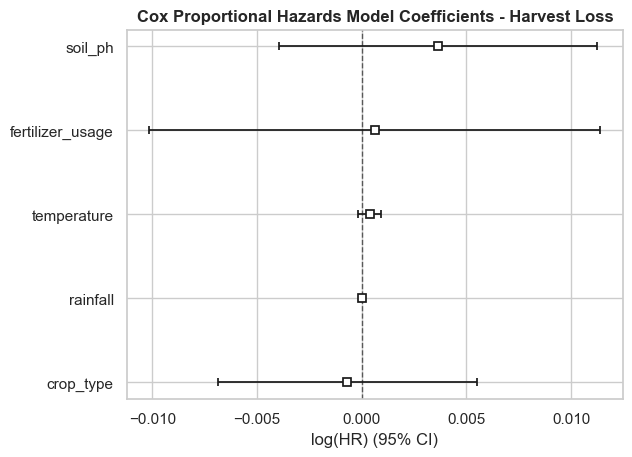

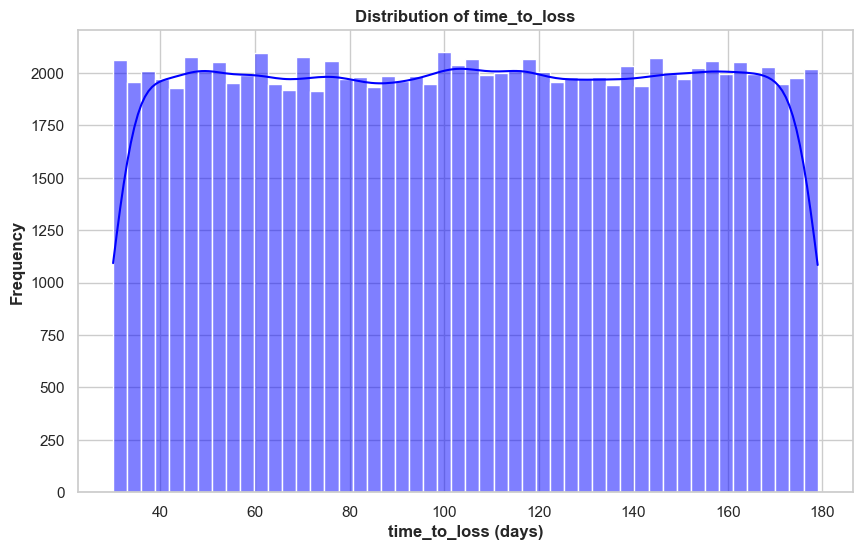

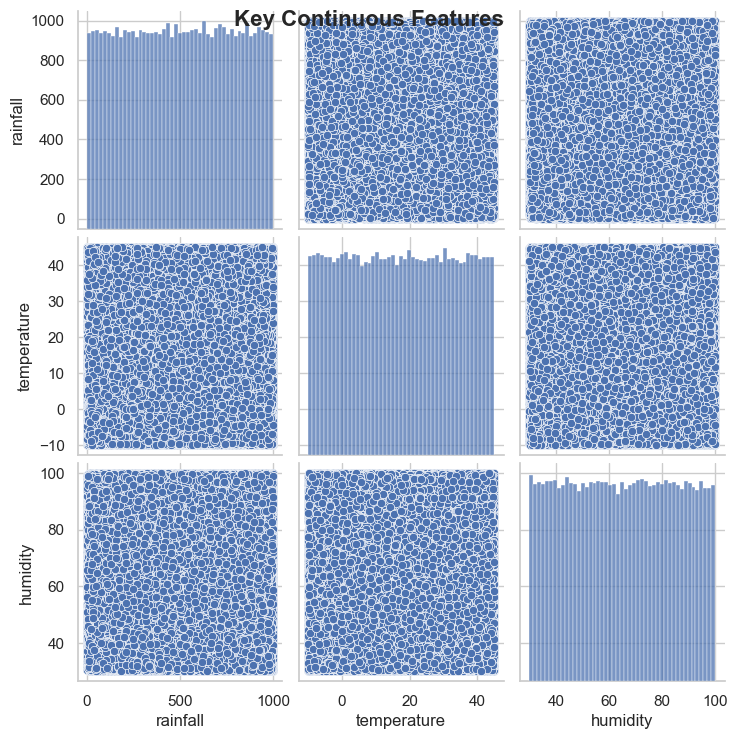

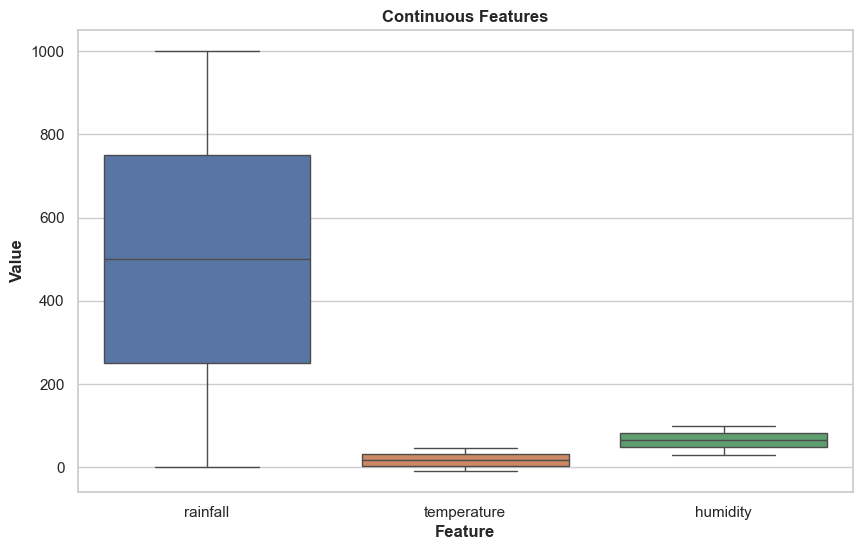

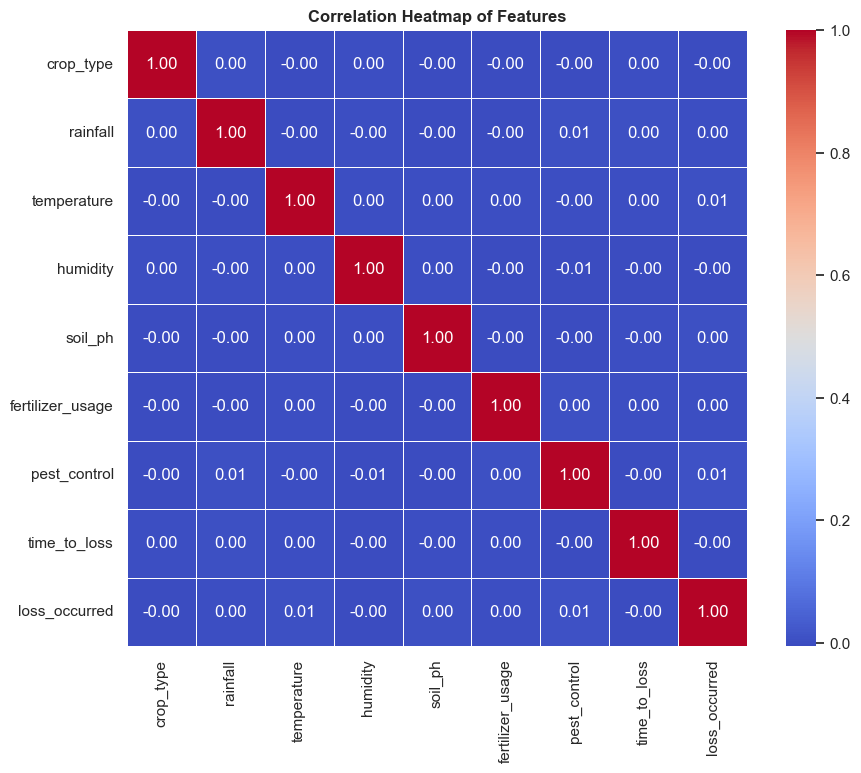

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from lifelines import KaplanMeierFitter, CoxPHFitter
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

sns.set(style="whitegrid")

def load_data(csv_path):
    try:
        df = pd.read_csv(csv_path)
        print(f"Dataset loaded successfully. Columns: {df.columns.tolist()}")
        return df
    except Exception as e:
        print(f"Error loading dataset: {e}")
        return None

def preprocess_data(df):
    # Convert categorical columns to numerical using Label Encoding
    le = LabelEncoder()
    categorical_columns = ['crop_type', 'fertilizer_usage', 'pest_control']  # Modify based on your dataset
    for column in categorical_columns:
        if column in df.columns:
            df[column] = le.fit_transform(df[column].astype(str))
    
    # Handling missing values (if any)
    df.fillna(df.mean(), inplace=True)
    return df

# Kaplan-Meier Survival Analysis
def kaplan_meier(df, time_column, event_column):
    kmf = KaplanMeierFitter()
    kmf.fit(df[time_column], event_observed=df[event_column])
    kmf.plot(ci_show=True)
    plt.title('Kaplan-Meier Survival Curve - Time to Harvest Loss', fontweight='bold')
    plt.xlabel('Time (days)', fontweight='bold')
    plt.ylabel('Survival Probability', fontweight='bold')
    plt.show()

# Cox Proportional Hazards Model
def cox_proportional_hazards(df, time_column, event_column):
    cph = CoxPHFitter()
    cph.fit(df[['time_to_loss', 'loss_occurred', 'crop_type', 'rainfall', 'temperature', 'soil_ph', 'fertilizer_usage']], duration_col=time_column, event_col=event_column)
    cph.print_summary()
    
    # Visualizing the coefficients
    cph.plot()
    plt.title('Cox Proportional Hazards Model Coefficients - Harvest Loss', fontweight='bold')
    plt.show()

# Visualizing the distribution of continuous variables
def visualize_continuous_variables(df, time_column):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[time_column], kde=True, color='blue', bins=50)
    plt.title(f'Distribution of {time_column}', fontweight='bold')
    plt.xlabel(f'{time_column} (days)', fontweight='bold')
    plt.ylabel('Frequency', fontweight='bold')
    plt.show()

# Pairplot of important continuous features
def pairplot_continuous(df, columns):
    sns.pairplot(df[columns])
    plt.suptitle('Key Continuous Features', fontsize=16, fontweight='bold')
    plt.show()

# Boxplot of continuous features
def boxplot_continuous(df, features):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df[features])
    plt.title('Continuous Features', fontweight='bold')
    plt.xlabel('Feature', fontweight='bold')
    plt.ylabel('Value', fontweight='bold')
    plt.show()

# Correlation heatmap
def correlation_heatmap(df):
    plt.figure(figsize=(10, 8))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title('Correlation Heatmap of Features', fontweight='bold')
    plt.show()

# Violin plot for the impact of environmental stressors on time to harvest loss
def violin_plot_time_to_loss_by_stress(df, time_column):
    plt.figure(figsize=(10, 6))
    sns.violinplot(x='rainfall', y=time_column, data=df)
    plt.title('Time to Harvest Loss by Rainfall', fontweight='bold')
    plt.xlabel('Rainfall', fontweight='bold')
    plt.ylabel(f'{time_column} (days)', fontweight='bold')
    plt.show()

# Scatter plot: Temperature vs Time to Harvest Loss
def scatter_temperature_time(df, temperature_column, time_column):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=temperature_column, y=time_column, data=df)
    plt.title(f'{temperature_column} vs {time_column}', fontweight='bold')
    plt.xlabel(f'{temperature_column} (°C)', fontweight='bold')
    plt.ylabel(f'{time_column} (days)', fontweight='bold')
    plt.show()

# Countplot for categorical feature (e.g., Pest Control)
def countplot_feature(df, feature_column):
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature_column, data=df)
    plt.title(f'Count of {feature_column}', fontweight='bold')
    plt.xlabel(feature_column, fontweight='bold')
    plt.ylabel('Count', fontweight='bold')
    plt.show()

# Plot of cumulative hazards
def plot_cumulative_hazard(df, time_column, event_column):
    kmf = KaplanMeierFitter()
    kmf.fit(df[time_column], event_observed=df[event_column])
    kmf.plot_cumulative_hazard()
    plt.title('Cumulative Hazard Plot for Harvest Loss', fontweight='bold')
    plt.xlabel('Time (days)', fontweight='bold')
    plt.ylabel('Cumulative Hazard', fontweight='bold')
    plt.show()

# Histogram of time to loss grouped by crop type
def histogram_time_to_loss_by_crop(df, time_column):
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=time_column, hue='crop_type', kde=True, bins=50)
    plt.title(f'Distribution of {time_column} by Crop Type', fontweight='bold')
    plt.xlabel(f'{time_column} (days)', fontweight='bold')
    plt.ylabel('Frequency', fontweight='bold')
    plt.show()

# Main function
def run_analysis(csv_path, time_column, event_column):
    df = load_data(csv_path)
    if df is None:
        return
    
    # Preprocess data
    df = preprocess_data(df)
    
    # Kaplan-Meier Survival Analysis
    kaplan_meier(df, time_column, event_column)
    
    # Cox Proportional Hazards Model
    cox_proportional_hazards(df, time_column, event_column)
    
    # Visualizations
    visualize_continuous_variables(df, time_column)
    pairplot_continuous(df, ['rainfall', 'temperature', 'humidity'])
    boxplot_continuous(df, ['rainfall', 'temperature', 'humidity'])
    correlation_heatmap(df)
    violin_plot_time_to_loss_by_stress(df, time_column)
    scatter_temperature_time(df, 'temperature', time_column)
    countplot_feature(df, 'pest_control')
    plot_cumulative_hazard(df, time_column, event_column)
    histogram_time_to_loss_by_crop(df, time_column)

# Example usage
csv_path = 'G:/venv/agriculture_yield_loss_data.csv'  
time_column = 'time_to_loss'  # Replace with the actual column name for time to harvest loss
event_column = 'loss_occurred'  # Replace with the actual column name for loss occurrence
run_analysis(csv_path, time_column, event_column)
